In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('dataset/aftersales.csv')

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

Dataset Shape: (500, 11)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_ID        500 non-null    int64 
 1   Age                500 non-null    int64 
 2   Gender             500 non-null    object
 3   Purchase_Date      500 non-null    object
 4   Product_Type       500 non-null    object
 5   Last_Service_Date  500 non-null    object
 6   Service_Frequency  500 non-null    object
 7   Feedback_Rating    500 non-null    int64 
 8   Complaint_Flag     500 non-null    object
 9   Service_Cost       500 non-null    int64 
 10  Loyalty_Score      500 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 43.1+ KB


Let's analyze customer demographics and segmentation:

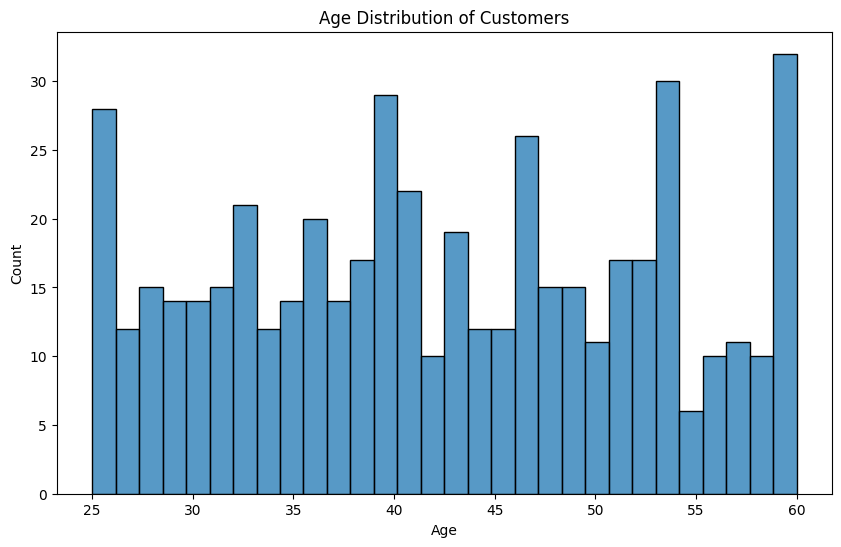

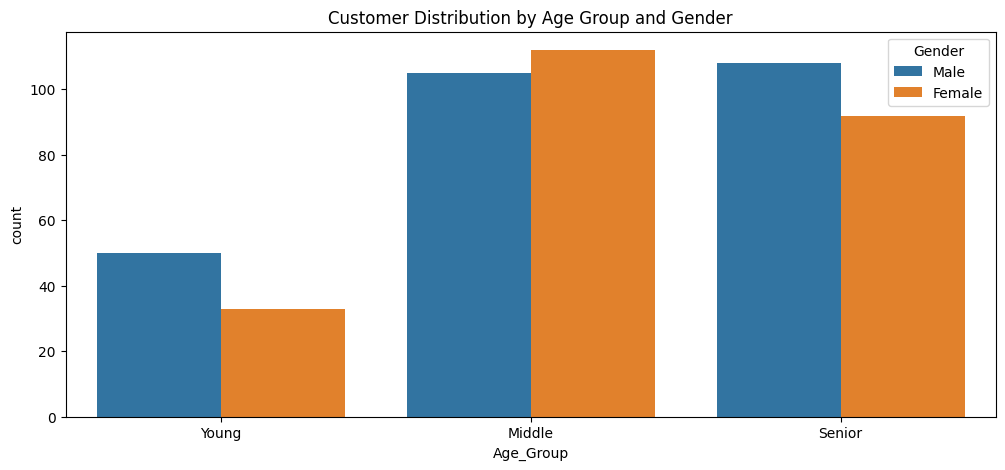

In [2]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution of Customers')
plt.show()

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60], labels=['Young', 'Middle', 'Senior'])

# Gender and age group distribution
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Age_Group', hue='Gender')
plt.title('Customer Distribution by Age Group and Gender')
plt.show()

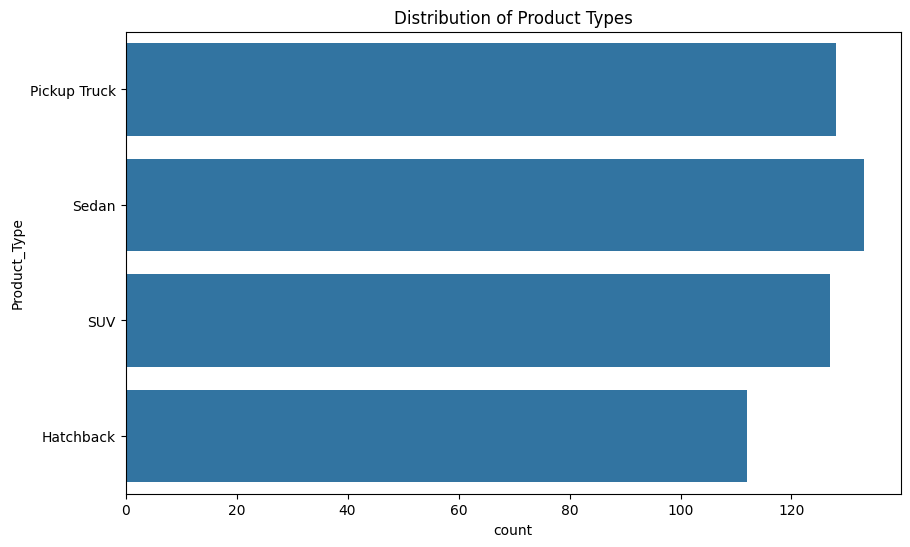

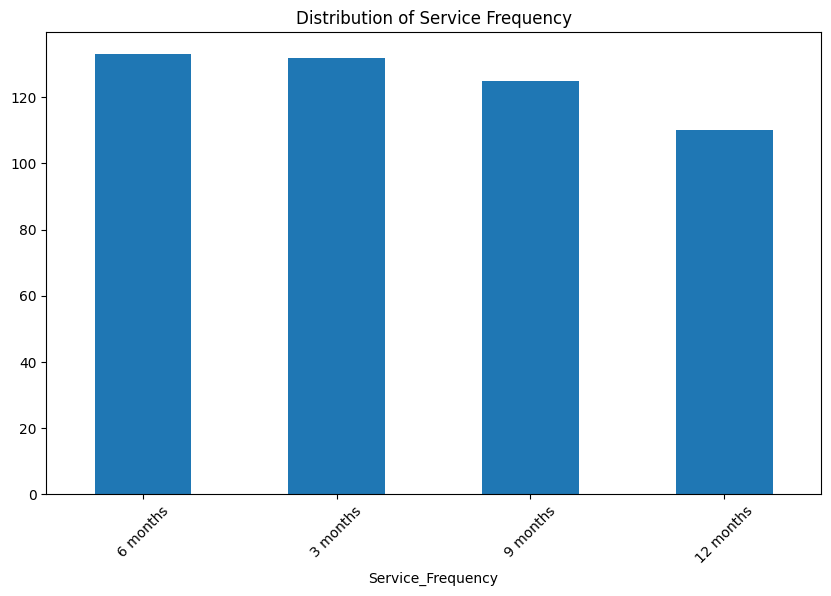

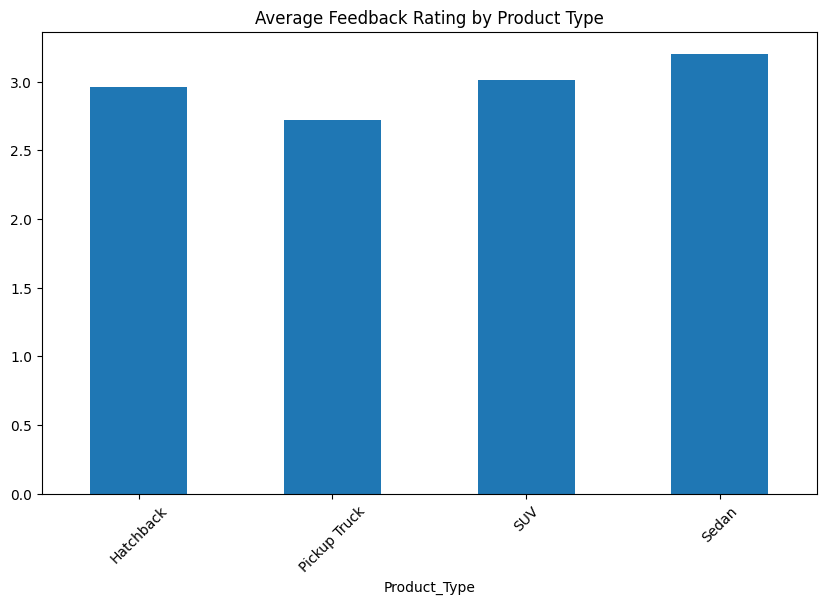

In [3]:
# Product type distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Product_Type')
plt.title('Distribution of Product Types')
plt.show()

# Service frequency analysis
plt.figure(figsize=(10,6))
service_freq = df['Service_Frequency'].value_counts()
service_freq.plot(kind='bar')
plt.title('Distribution of Service Frequency')
plt.xticks(rotation=45)
plt.show()

# Average feedback rating by product type
plt.figure(figsize=(10,6))
df.groupby('Product_Type')['Feedback_Rating'].mean().plot(kind='bar')
plt.title('Average Feedback Rating by Product Type')
plt.xticks(rotation=45)
plt.show()

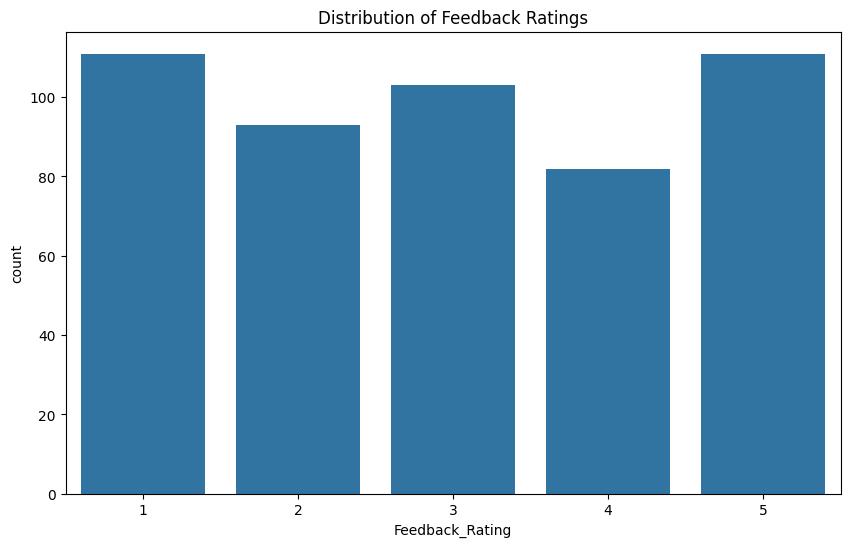

<Figure size 1000x600 with 0 Axes>

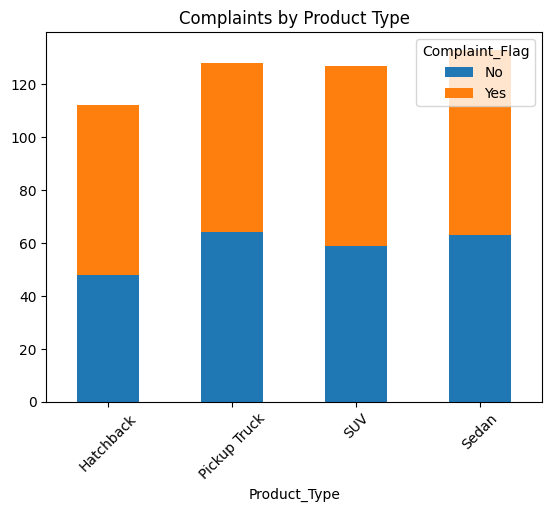

In [4]:
# Feedback distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Feedback_Rating')
plt.title('Distribution of Feedback Ratings')
plt.show()

# Complaint analysis
complaint_by_product = pd.crosstab(df['Product_Type'], df['Complaint_Flag'])
plt.figure(figsize=(10,6))
complaint_by_product.plot(kind='bar', stacked=True)
plt.title('Complaints by Product Type')
plt.xticks(rotation=45)
plt.show()

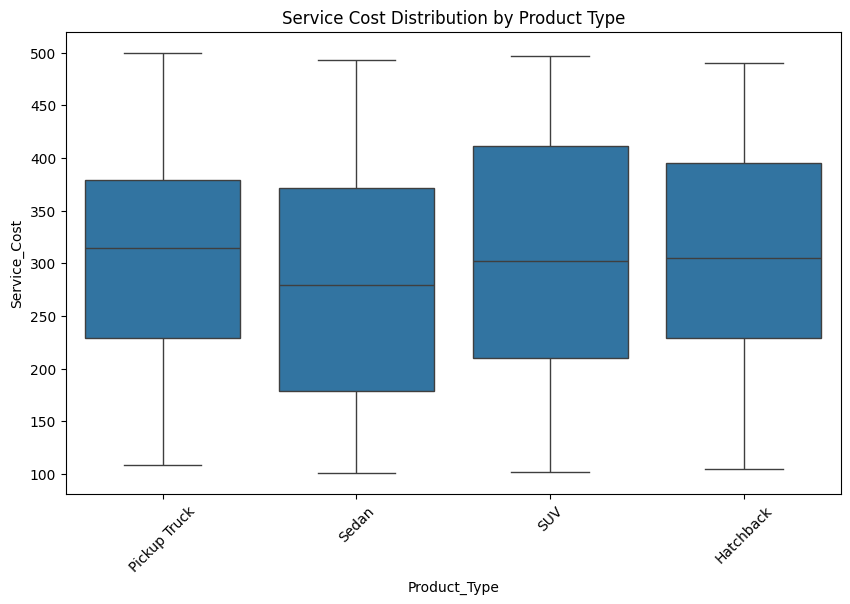

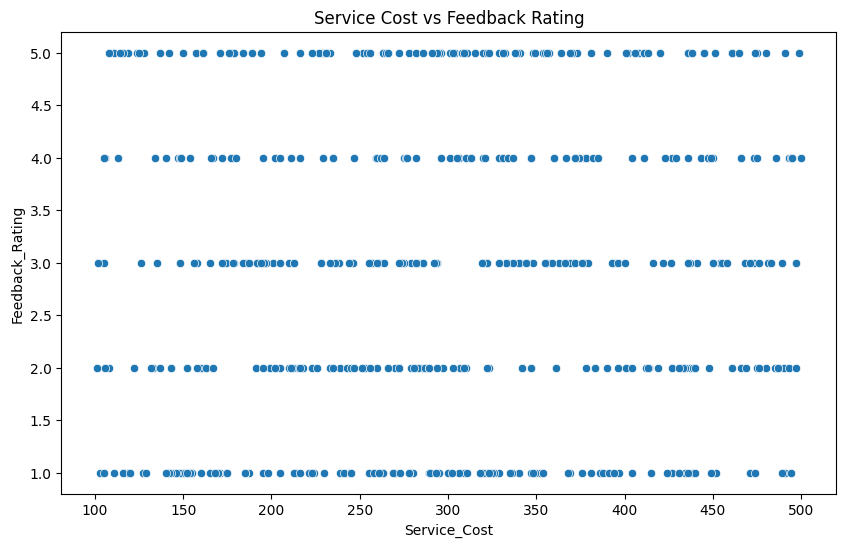

In [5]:
# Service cost distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product_Type', y='Service_Cost')
plt.title('Service Cost Distribution by Product Type')
plt.xticks(rotation=45)
plt.show()

# Correlation between service cost and feedback
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Service_Cost', y='Feedback_Rating')
plt.title('Service Cost vs Feedback Rating')
plt.show()

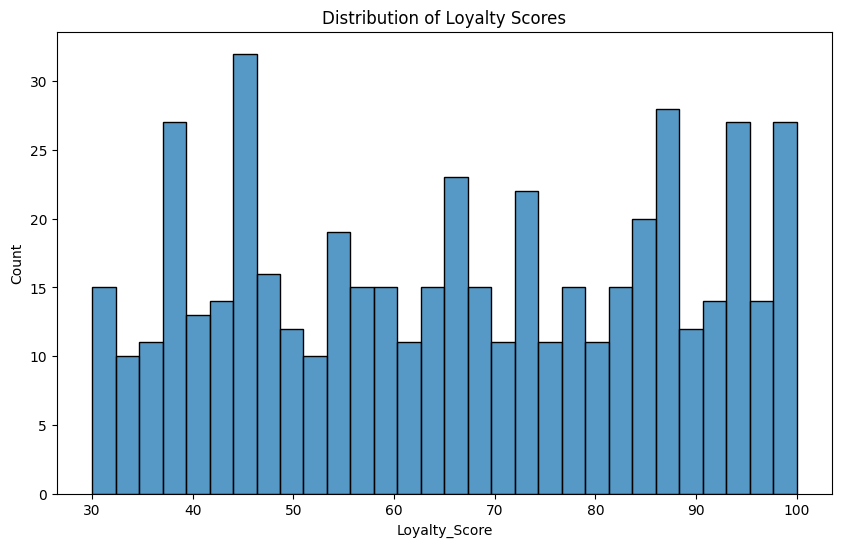

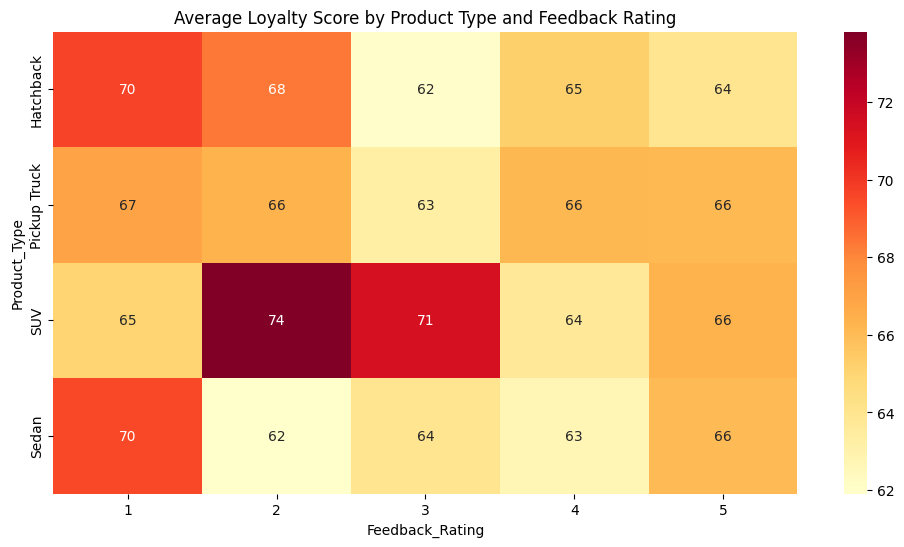

In [6]:
# Loyalty score distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Loyalty_Score', bins=30)
plt.title('Distribution of Loyalty Scores')
plt.show()

# Average loyalty score by product type and feedback rating
loyalty_analysis = df.pivot_table(
    values='Loyalty_Score',
    index='Product_Type',
    columns='Feedback_Rating',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(loyalty_analysis, annot=True, cmap='YlOrRd')
plt.title('Average Loyalty Score by Product Type and Feedback Rating')
plt.show()

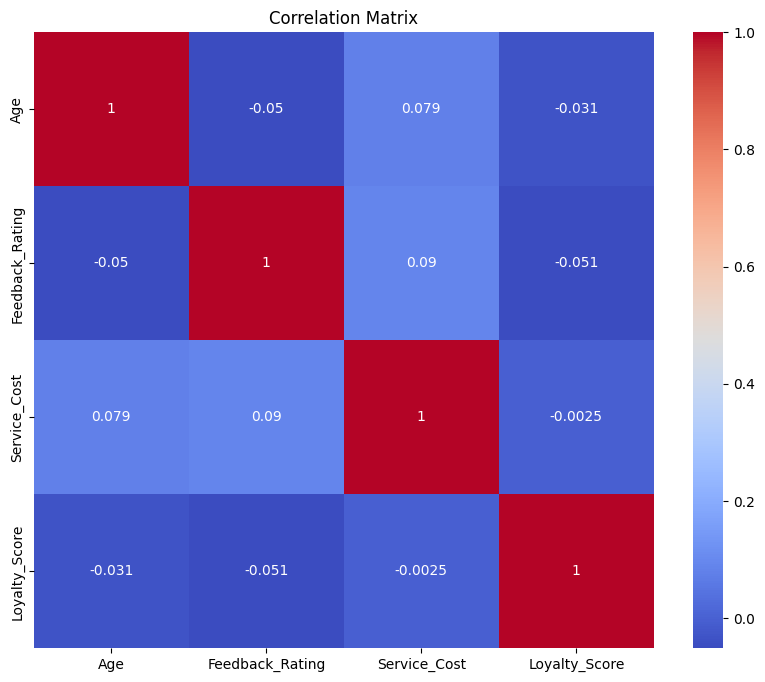

In [7]:
# Calculate correlations between numeric variables
numeric_cols = ['Age', 'Feedback_Rating', 'Service_Cost', 'Loyalty_Score']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

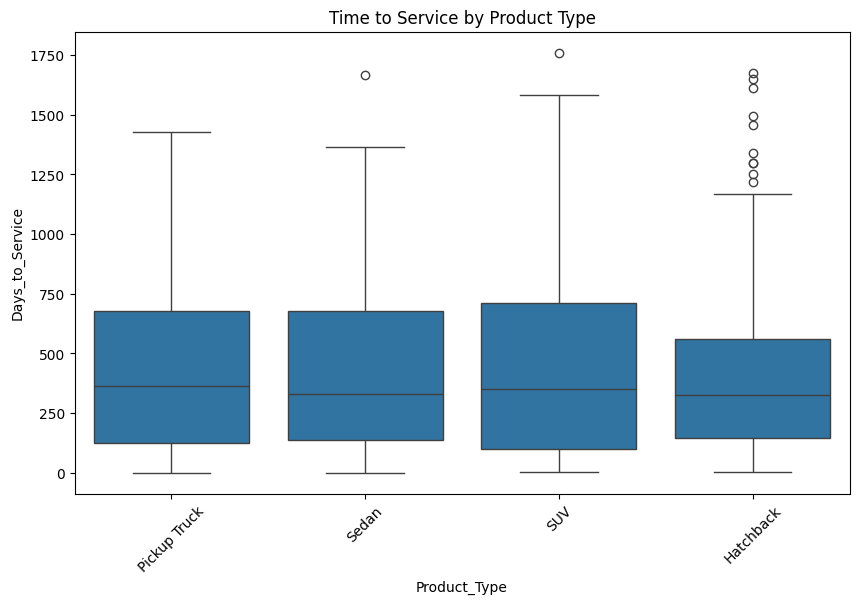

In [8]:
# Convert date columns to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'])

# Calculate time between purchase and last service
df['Days_to_Service'] = (df['Last_Service_Date'] - df['Purchase_Date']).dt.days

# Time to service analysis
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product_Type', y='Days_to_Service')
plt.title('Time to Service by Product Type')
plt.xticks(rotation=45)
plt.show()

In [9]:
print("\nKey Metrics Summary:")
print("-" * 50)
print(f"Average Feedback Rating: {df['Feedback_Rating'].mean():.2f}")
print(f"Average Service Cost: ${df['Service_Cost'].mean():.2f}")
print(f"Average Loyalty Score: {df['Loyalty_Score'].mean():.2f}")
print(f"Complaint Rate: {(df['Complaint_Flag']=='Yes').mean()*100:.1f}%")

print("\nProduct Type Summary:")
print("-" * 50)
product_summary = df.groupby('Product_Type').agg({
    'Feedback_Rating': 'mean',
    'Service_Cost': 'mean',
    'Loyalty_Score': 'mean',
    'Customer_ID': 'count'
}).round(2)
print(product_summary)

print("\nService Frequency Summary:")
print("-" * 50)
print(df['Service_Frequency'].value_counts(normalize=True).round(3) * 100)


Key Metrics Summary:
--------------------------------------------------
Average Feedback Rating: 2.98
Average Service Cost: $300.11
Average Loyalty Score: 66.25
Complaint Rate: 53.2%

Product Type Summary:
--------------------------------------------------
              Feedback_Rating  Service_Cost  Loyalty_Score  Customer_ID
Product_Type                                                           
Hatchback                2.96        307.27          65.87          112
Pickup Truck             2.72        308.99          65.76          128
SUV                      3.02        301.98          68.40          127
Sedan                    3.20        283.74          64.98          133

Service Frequency Summary:
--------------------------------------------------
Service_Frequency
6 months     26.6
3 months     26.4
9 months     25.0
12 months    22.0
Name: proportion, dtype: float64


This analysis provides a comprehensive view of:

Customer demographics and segmentation
Product performance and service patterns
Customer satisfaction and loyalty
Service costs and efficiency
Time-based service patterns
Key correlations and relationships